In [1]:

import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns

# пакеты для стемминга, словари с stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# разные векторизаторы
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

import numpy as np


# для выделения подвыборки
from sklearn.model_selection import train_test_split
# для вычисления оценок качества классификации
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# классификаторы
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

In [2]:
warnings.filterwarnings('ignore')

In [31]:
# директория с файлами-отзывами
path = r'C:/Data/KinoPoisk/'
df = pd.DataFrame(columns=['review','sentiment'])

for directory in os.listdir(path):
    if os.path.isdir(path + directory):
        files = np.array(os.listdir(path + directory))
        for file in files:
            with open(os.path.join(path + directory + '/', file), encoding='utf-8') as f:
                review = f.read()
                current_df = pd.DataFrame({'review': [review], 'sentiment': directory})
                df = df.append(current_df, ignore_index=True)


In [32]:
df

,review,sentiment
0,"Джон Траволта снова в роли гангстера, тем боле...",neg
1,Художественный фильм «Кодекс Готти» рассказыва...,neg
2,Обычно пропаганду в детские мультфильмы сует у...,neg
3,"Это фильм-настроение. Это штрихи к портрету, а...",neg
4,"О том, что в Голливуде затеяли очередной проек...",neg
...,...,...
6412,"Это история об одном епископе, по имени Генри ...",pos
6413,Япония начала XX века. Молодой студент Мидзуха...,pos
6414,"'Жили были'- первый фильм, после просмотра кот...",pos
6415,Да потому что в английском слово project имеет...,pos


<AxesSubplot:xlabel='sentiment', ylabel='count'>

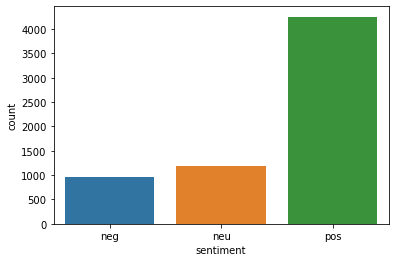

In [33]:
sns.countplot(df['sentiment'])

In [36]:
# Векторизуем простым способом BagOfWords
count = CountVectorizer(analyzer = 'word')
bag_of_words = count.fit_transform(df['review'])

In [37]:
features = bag_of_words.toarray()
features.shape

(6417, 155896)

In [15]:
target = df['sentiment']

In [16]:
# разбиваем имеющуюся выборку на части
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [38]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [39]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.86      0.74      0.80       189
         neu       0.73      0.67      0.70       231
         pos       0.90      0.95      0.92       864

    accuracy                           0.87      1284
   macro avg       0.83      0.78      0.81      1284
weighted avg       0.86      0.87      0.86      1284

